# Import Basic Libraries

In [ ]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# Reading Dataset

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/sKarmony/Compitative-Coding/master/dataset.csv' )
dataset = df

In [ ]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


# Data Processing

In [ ]:
#importing required libraries for data transformation
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()

In [ ]:
scaler.fit(df.drop('target',axis=1))

StandardScaler(copy=True, with_mean=True, with_std=True)

In [ ]:
scaled_features = scaler.transform(df.drop('target',axis=1))
scaled_features

array([[ 0.9521966 ,  0.68100522,  1.97312292, ..., -2.27457861,
        -0.71442887, -2.14887271],
       [-1.91531289,  0.68100522,  1.00257707, ..., -2.27457861,
        -0.71442887, -0.51292188],
       [-1.47415758, -1.46841752,  0.03203122, ...,  0.97635214,
        -0.71442887, -0.51292188],
       ...,
       [ 1.50364073,  0.68100522, -0.93851463, ..., -0.64911323,
         1.24459328,  1.12302895],
       [ 0.29046364,  0.68100522, -0.93851463, ..., -0.64911323,
         0.26508221,  1.12302895],
       [ 0.29046364, -1.46841752,  0.03203122, ..., -0.64911323,
         0.26508221, -0.51292188]])

In [ ]:
#create a new transformed dataset
df1 = pd.DataFrame(scaled_features, index=df.index, columns=df.columns[0:13])

In [ ]:
df1['target']=df['target']
df1.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,0.952197,0.681005,1.973123,0.763956,-0.256334,2.394438,-1.005832,0.015443,-0.696631,1.087338,-2.274579,-0.714429,-2.148873,1
1,-1.915313,0.681005,1.002577,-0.092738,0.072199,-0.417635,0.898962,1.633471,-0.696631,2.122573,-2.274579,-0.714429,-0.512922,1
2,-1.474158,-1.468418,0.032031,-0.092738,-0.816773,-0.417635,-1.005832,0.977514,-0.696631,0.310912,0.976352,-0.714429,-0.512922,1
3,0.180175,0.681005,0.032031,-0.663867,-0.198357,-0.417635,0.898962,1.239897,-0.696631,-0.206705,0.976352,-0.714429,-0.512922,1
4,0.290464,-1.468418,-0.938515,-0.663867,2.082050,-0.417635,0.898962,0.583939,1.435481,-0.379244,0.976352,-0.714429,-0.512922,1


# Data Interpretation (Charts and Plots)

**Box And Whisker Plot**




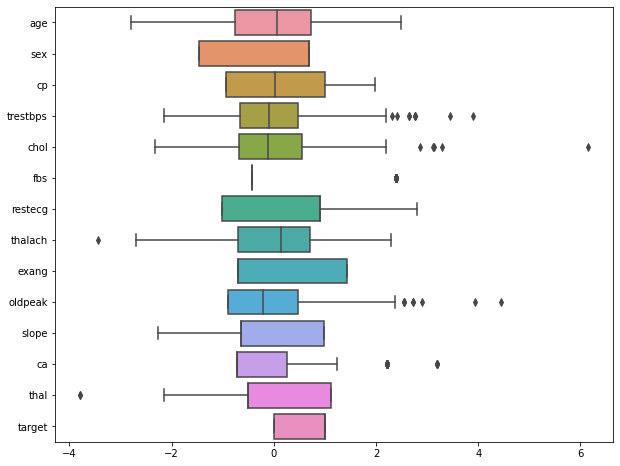

In [ ]:
fig = plt.figure(figsize=(10,8))
ax = sns.boxplot(data=df1, orient= 'h')

**Pair Plot**

<Figure size 1440x720 with 0 Axes>

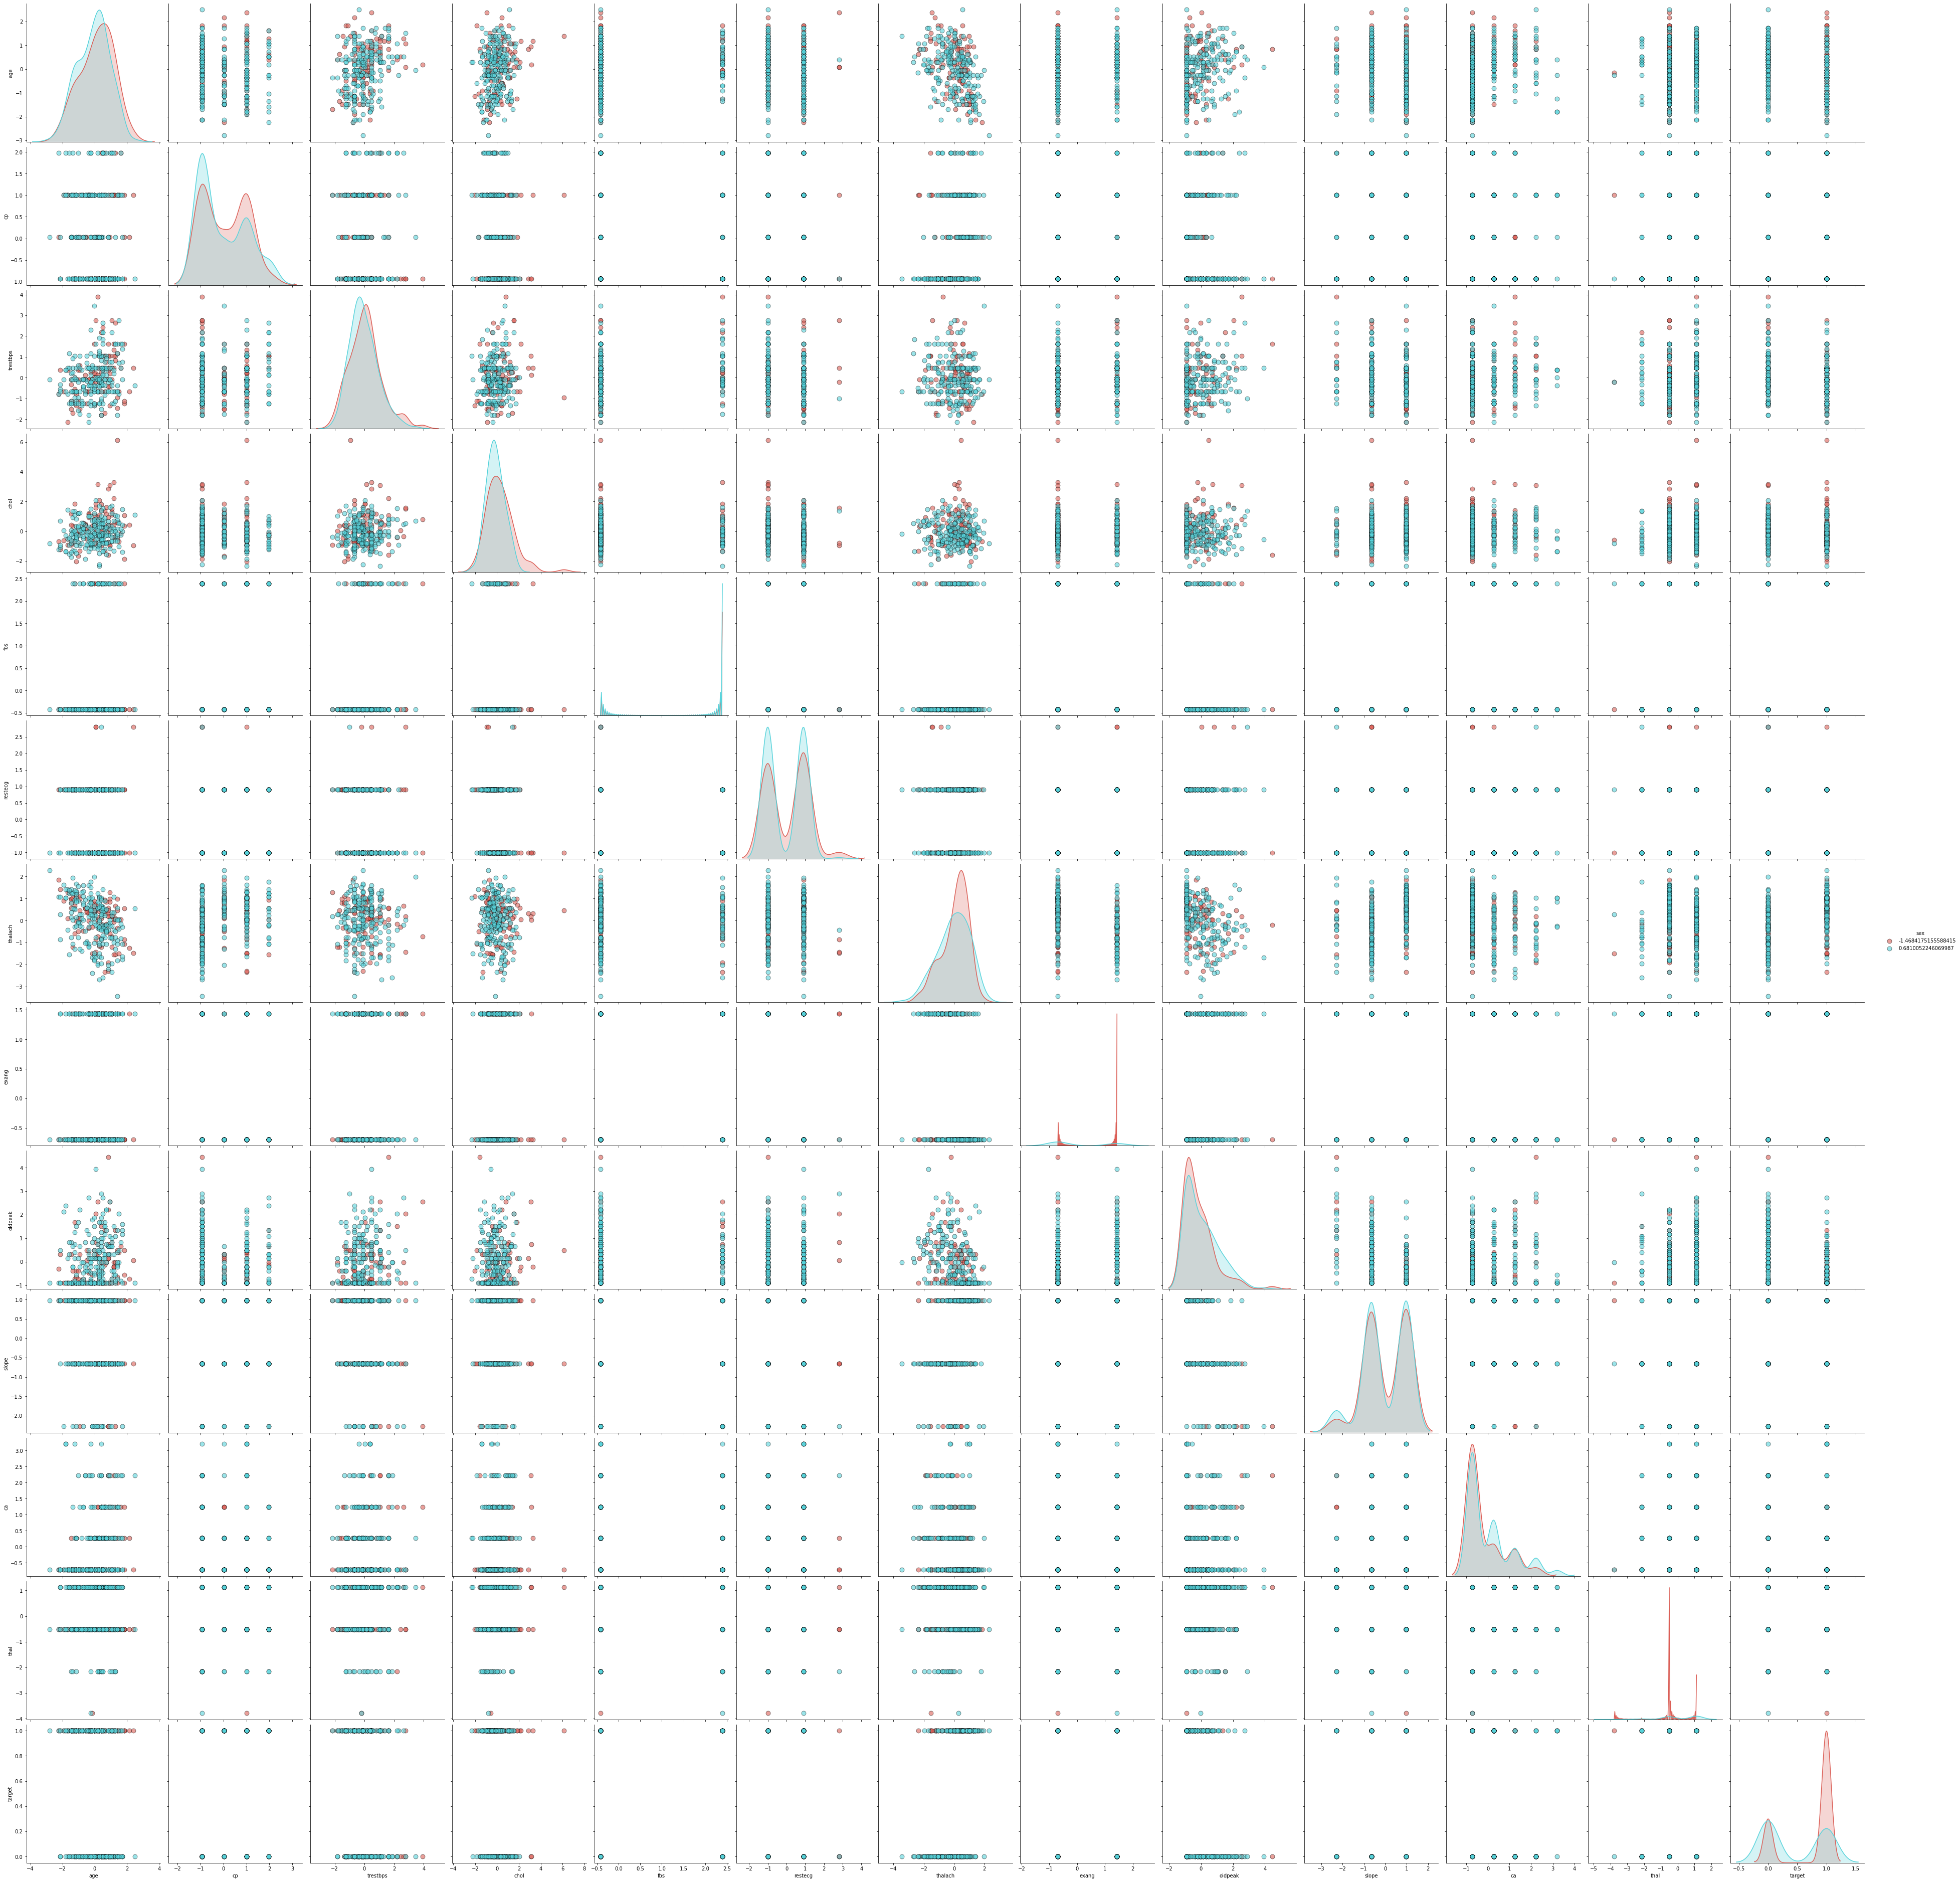

In [ ]:
fig = plt.figure(figsize=(20,10))
sns.pairplot(df1, hue='sex',diag_kind = 'kde', palette='hls',  plot_kws = {'alpha': 0.6, 's': 80, 'edgecolor': 'k'},
             height = 4)
plt.show()

**Correlation Matrix And Heatmap**

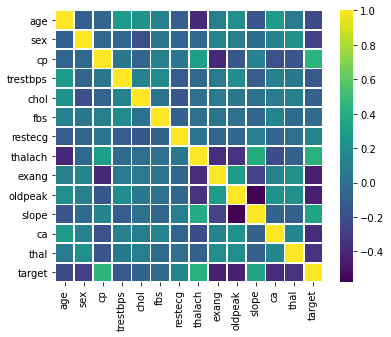

In [ ]:
corr = df1.corr()

# plot the heatmap
fig = plt.figure(figsize=(6,5))
sns.heatmap(corr, xticklabels=corr.columns,yticklabels=corr.columns,linewidths=.75,cmap= 'viridis')

Bar Graph

In [ ]:
healthy = df1[(df1['target'] ==0) ].count()[1]
sick = df1[(df1['target'] ==1) ].count()[1]
print ("Number of people without heart disease: "+ str(healthy))
print ("Number of people with chance for heart disease : "+ str(sick))

Number of people without heart disease: 138
Number of people with chance for heart disease : 165


Text(0.5, 1.0, 'Count of each Target Class')

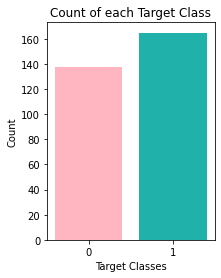

In [ ]:
plt.rcParams['figure.figsize'] = 3,4
plt.bar(df1['target'].unique(), df1['target'].value_counts(), color = ['lightseagreen', 'lightpink'])
plt.xticks([0, 1])
plt.xlabel('Target Classes')
plt.ylabel('Count')
plt.title('Count of each Target Class')

Histograms

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  after removing the cwd from sys.path.


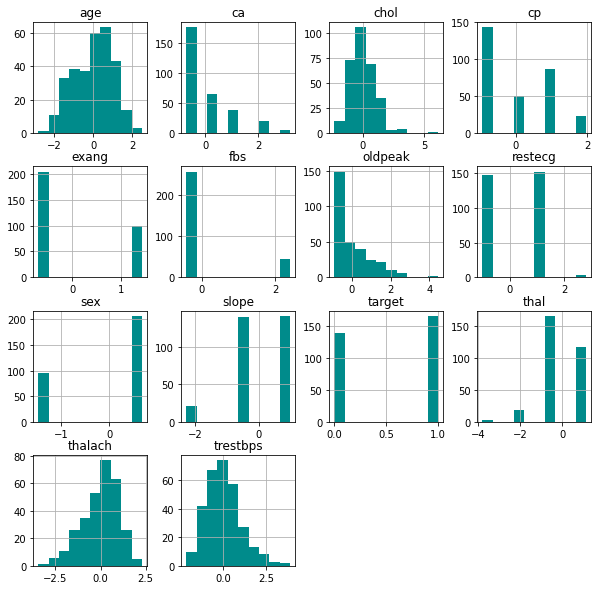

In [ ]:
fig = plt.figure(figsize = (10,10))
ax = fig.gca()

df1.hist(ax=ax,color='darkcyan')
plt.show()

# Training And Testing

In [ ]:
#importing required libraries for data splitting 
from sklearn.model_selection import train_test_split

In [ ]:
X = df1.drop('target',axis=1)
y = df1['target']

In [ ]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y, test_size=0.2, random_state=101)
X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y, test_size=0.3, random_state=101)
X_train3, X_test3, y_train3, y_test3 = train_test_split(X, y, test_size=0.4, random_state=101)


# Algorithms

GLOSSARY

fn - false negative values

---


tn - true negative values

---


fp - false positive values

---


fn - false negative values

---


fnr - false negative rate

---


tpr - true positive rate / sensitivity

---


fpr - false positive rate 

---


tnr - true negative rate 

---
acc - accuracy

---


pc - precision

---


rc - recall

---


f1_score - f1 measure

---

roc - receiver operation characteristic

---


mcc - matthew correlation coefficient

---


npv - negative predictive value

---


fdr - false discovery rate

---
specificity - specificity


## Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier 

Training the data based on 3 Training-Testing Ratios  [ 80:20, 70:30, 60:40 ]

In [ ]:
dtree = DecisionTreeClassifier(criterion='entropy')
dtree.fit(X_train1, y_train1)
dtree.fit(X_train2, y_train2)
dtree.fit(X_train3, y_train3)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
predictions1 = dtree.predict(X_test1)
predictions2 = dtree.predict(X_test2)
predictions3 = dtree.predict(X_test3)

### Results

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import accuracy_score , f1_score ,matthews_corrcoef , precision_score ,roc_curve, auc


TRAINING RATIO (80:20)

              precision    recall  f1-score   support

           0       0.83      0.77      0.80        31
           1       0.78      0.83      0.81        30

    accuracy                           0.80        61
   macro avg       0.80      0.80      0.80        61
weighted avg       0.80      0.80      0.80        61



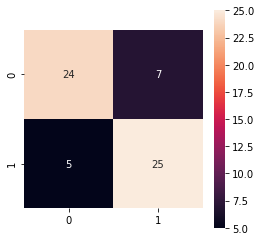

In [ ]:
tn1, fp1, fn1, tp1= confusion_matrix(y_test1, predictions1).ravel() #Extracting values of tn , fp , fn and tp from the confusion matrix
cf_matrix=confusion_matrix(y_test1,predictions1)
fig = plt.figure(figsize=(4,4))
sns.heatmap(cf_matrix, annot=True,square=True)
print(classification_report(y_test1,predictions1)) 
tpr1=(tp1)/(tp1+fn1) #sensitivity / true positive rate
fpr1=(fp1)/(fp1+tn1) #false positive rate
fnr1=(fn1)/(tp1+fn1) #false negative rate
npv1= tn1/(tn1+fn1) #Negative predictive value
fdr1=fp1/(fp1+tp1) #false discovery rate
mcc1= matthews_corrcoef(y_test1,predictions1) #Matthews Corelation Coefficient
pc1=precision_score(y_test1, predictions1) #precision 
specificity1= (tn1)/(tn1+fp1) #specificity
f1, t1,_ = roc_curve(y_test1,predictions1) #Extracting values of fpr and tpr from confusion matrix
rc1=auc(f1,t1) #roc
f1_score1=f1_score(y_test1, predictions1) #f1 measure
acc1=accuracy_score(y_test1, predictions1) #accuracy

TRAINING RATIO (70:30)

              precision    recall  f1-score   support

           0       0.82      0.75      0.79        44
           1       0.78      0.85      0.82        47

    accuracy                           0.80        91
   macro avg       0.80      0.80      0.80        91
weighted avg       0.80      0.80      0.80        91



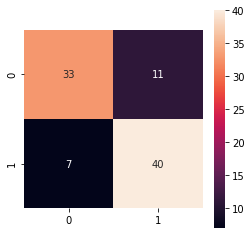

In [ ]:
tn2, fp2, fn2, tp2= confusion_matrix(y_test2, predictions2).ravel() #Extracting values of tn , fp , fn and tp from the confusion matrix
cf_matrix2=confusion_matrix(y_test2,predictions2) 
fig = plt.figure(figsize=(4,4))
sns.heatmap(cf_matrix2, annot=True,square=True)
print(classification_report(y_test2,predictions2)) 
tpr2=(tp2)/(tp2+fn2) #sensitivity / true positive rate
fpr2=(fp2)/(fp2+tn2) #false positive rate
fnr2=(fn2)/(tp2+fn2) #false negative rate
npv2= tn2/(tn2+fn2) #Negative predictive value
fdr2=fp2/(fp2+tp2) #false discovery rate
mcc2= matthews_corrcoef(y_test2,predictions2) #Matthews Corelation Coefficient
specificity2= (tn2)/(tn2+fp2) #specificity
pc2=precision_score(y_test2, predictions2) #precision 
f2, t2,_ = roc_curve(y_test2,predictions2) #Extracting values of fpr and tpr from confusion matrix
rc2=auc(f2,t2) #roc
f1_score2=f1_score(y_test2,predictions2) #f1 measure
acc2=accuracy_score(y_test2, predictions2) #accuracy

TRAINING RATIO (60:40)

              precision    recall  f1-score   support

           0       0.80      0.75      0.78        60
           1       0.77      0.82      0.80        62

    accuracy                           0.79       122
   macro avg       0.79      0.79      0.79       122
weighted avg       0.79      0.79      0.79       122



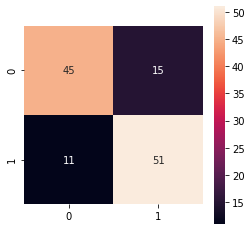

In [ ]:
tn3, fp3, fn3, tp3= confusion_matrix(y_test3, predictions3).ravel() #Extracting values of tn , fp , fn and tp from the confusion matrix
cf_matrix3=confusion_matrix(y_test3,predictions3) 
fig = plt.figure(figsize=(4,4))
sns.heatmap(cf_matrix3, annot=True,square=True)
print(classification_report(y_test3,predictions3))
tpr3=(tp3)/(tp3+fn3) #sensitivity / true positive rate
fpr3=(fp3)/(fp3+tn3) #false positive rate
fnr3=(fn3)/(tp3+fn3) #false negative rate
npv3= tn3/(tn3+fn3) #Negative predictive value
fdr3=fp3/(fp3+tp3) #false discovery rate
pc3=precision_score(y_test3, predictions3)
mcc3= matthews_corrcoef(y_test3,predictions3) #Matthews Corelation Coefficient 
specificity3= (tn3)/(tn3+fp3) #specificity
f3, t3,_ = roc_curve(y_test3,predictions3) #Extracting values of fpr and tpr from confusion matrix
rc3=auc(f3,t3) #roc
f1_score3=f1_score(y_test3, predictions3) #f1 measure
acc3=accuracy_score(y_test3, predictions3) #accuracy

ROC Curve

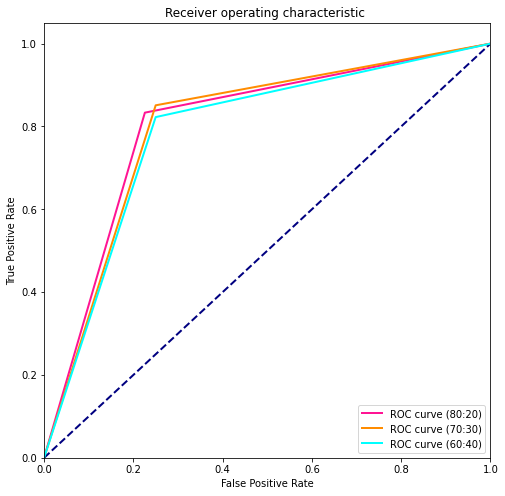

In [ ]:
plt.figure(figsize=(8,8))
lw = 2
plt.plot(f1, t1, color='deeppink',
         lw=lw, label='ROC curve (80:20)' % rc2)
plt.plot(f2, t2, color='darkorange',
         lw=lw, label='ROC curve (70:30)' % rc2)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.plot(f3, t3, color='aqua',
         lw=lw, label='ROC curve (60:40)' % rc3)

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic ')
plt.legend(loc="lower right")
plt.show()

#### Results for Hybrid Model 

####Results in Graphical Form

Text(0.5, 0.98, 'DECISION TREE')

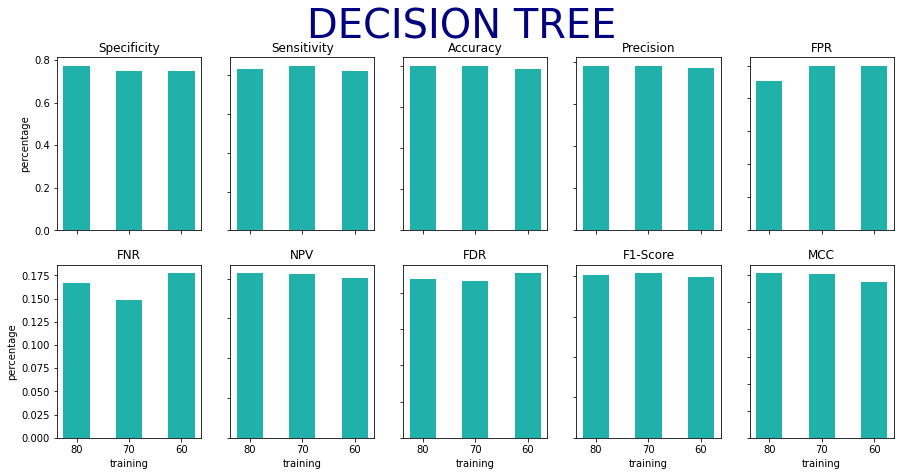

In [ ]:
training = [0,80,70,60]
data1 = [[specificity1, specificity2 , specificity3]]
data2 = [[tpr1, tpr2 , tpr3]]

data3 = [[acc1, acc2 , acc3]]

data4 = [[pc1, pc2 , pc3]]

data5 = [[fpr1, fpr2 , fpr3]]

data6 = [[fnr1, fnr2 , fnr3]]

data7 = [[npv1, npv2 , npv3]]

data8 = [[fdr1, fdr2 , fdr3]]

data9 = [[f1_score1, f1_score2 , f1_score3]]

data10 = [[mcc1, mcc2 , mcc3]]

X= np.arange(3)

fig, axs = plt.subplots(2, 5,figsize=(15,7))
axs[0,0].bar(X +0, data1[0], color = 'lightseagreen', width = 0.5,label = 'Decision Tree')
axs[0, 0].set_title('Specificity')

axs[0,1].bar(X+ 0, data2[0], color = 'lightseagreen', width = 0.5,label = 'Decision Tree')
axs[0, 1].set_title('Sensitivity')


axs[0,2].bar(X + 0.00, data3[0], color = 'lightseagreen', width = 0.5,label = 'Decision Tree')
axs[0, 2].set_title('Accuracy')

axs[0,3].bar(X + 0.00, data4[0], color = 'lightseagreen', width = 0.50 , label = 'Decision Tree')
axs[0, 3].set_title('Precision')

axs[0,4].bar(X + 0.00, data5[0], color = 'lightseagreen', width = 0.5,label = 'Decision Tree')
axs[0, 4].set_title('FPR')

axs[1,0].bar(X + 0.00, data6[0], color = 'lightseagreen', width = 0.5,label = 'Decision Tree')
axs[1, 0].set_title('FNR')

axs[1,1].bar(X + 0.00, data7[0], color = 'lightseagreen', width = 0.5,label = 'Decision Tree')
axs[1, 1].set_title('NPV')


axs[1,2].bar(X + 0.00, data8[0], color = 'lightseagreen', width = 0.5,label = 'Decision Tree')
axs[1, 2].set_title('FDR')


axs[1,3].bar(X + 0.00, data9[0], color = 'lightseagreen', width = 0.5,label = 'Decision Tree')
axs[1, 3].set_title('F1-Score')

axs[1,4].bar(X + 0.00, data10[0], color = 'lightseagreen', width = 0.5,label = 'Decision Tree')
axs[1,4].set_title('MCC')


for ax in axs.flat:
    ax.set(xlabel='training', ylabel='percentage')


for ax in axs.flat:
    ax.label_outer()
    ax.set_xticklabels(training)
  

fig.suptitle('DECISION TREE' , color="navy" , size = 40)




####Results in Tabular Form

In [ ]:
data = [["Specificity",specificity1,specificity2,specificity3], ["Sensitivity",tpr1, tpr2 , tpr3], ["Accuracy",acc1, acc2,acc3], ["Precision",pc1, pc2,pc3], ["FPR",fpr1, fpr2,fpr3], ["FNR",fnr1,fnr2,fnr3 ], ["NPV",npv1, npv2,npv3], ["FDR",fdr1, fdr2,fdr3], ["F1-Score",f1_score1, f1_score2,f1_score3], ["MCC",mcc1, mcc2,mcc3]]

pd.DataFrame(data, columns=["Algorithm and Measures ", "80:20 ","70:30","60:40"])

,Algorithm and Measures,80:20,70:30,60:40
0,Specificity,0.774194,0.750000,0.750000
1,Sensitivity,0.833333,0.851064,0.822581
2,Accuracy,0.803279,0.802198,0.786885
3,Precision,0.781250,0.784314,0.772727
4,FPR,0.225806,0.250000,0.250000
5,FNR,0.166667,0.148936,0.177419
6,NPV,0.827586,0.825000,0.803571
7,FDR,0.218750,0.215686,0.227273
8,F1-Score,0.806452,0.816327,0.796875
9,MCC,0.608181,0.605175,0.574437


####Decision Tree Plotting

In [ ]:
from IPython.display import Image
from sklearn.externals.six import StringIO
from sklearn.tree import export_graphviz
import pydot

features = list(df1.columns[:-1])
features

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


['age',
 'sex',
 'cp',
 'trestbps',
 'chol',
 'fbs',
 'restecg',
 'thalach',
 'exang',
 'oldpeak',
 'slope',
 'ca',
 'thal']

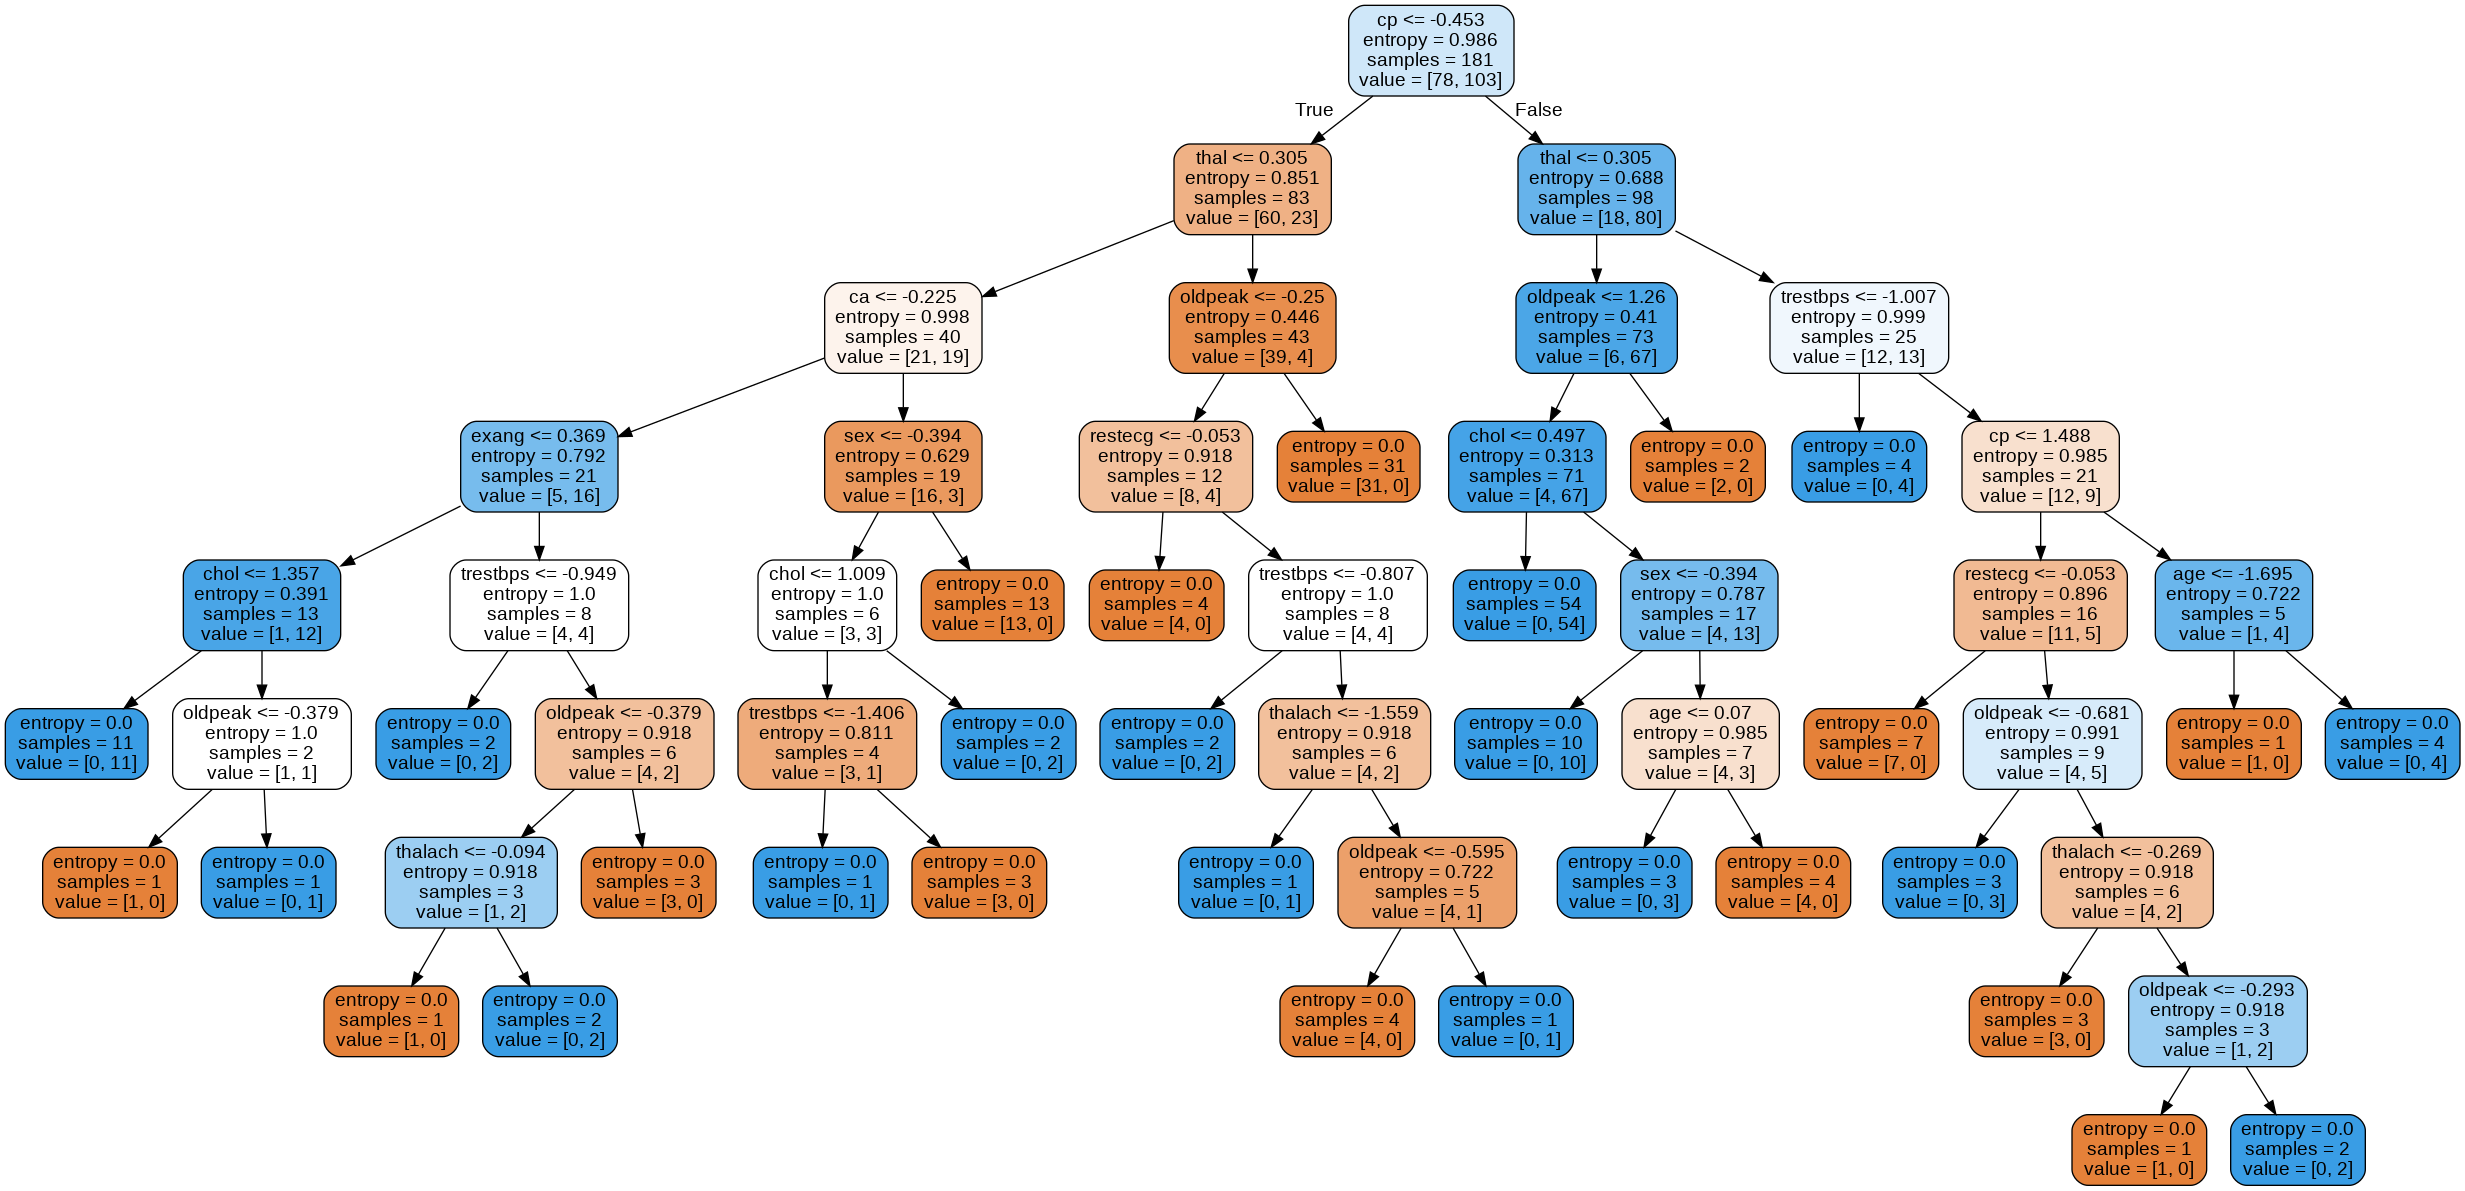

In [ ]:
dot_data = StringIO()  
export_graphviz(dtree, out_file=dot_data,feature_names=features,filled=True,rounded=True)

graph = pydot.graph_from_dot_data(dot_data.getvalue())  
Image(graph[0].create_png())  

## Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rf_scores = []
estimators = [10, 100, 150, 200, 250, 300, 500, 1000] #number of trees
for i in estimators:
    rf_classifier = RandomForestClassifier(n_estimators = i, random_state = 101)
    rf_classifier.fit(X_train1, y_train1)
    rf_scores.append(rf_classifier.score(X_test1, y_test1))

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import accuracy_score , f1_score ,matthews_corrcoef , precision_score ,roc_curve, auc


Random Forest Classifier scores for different number of estimators

Text(0.5, 1.0, 'Random Forest Classifier scores for different number of estimators')

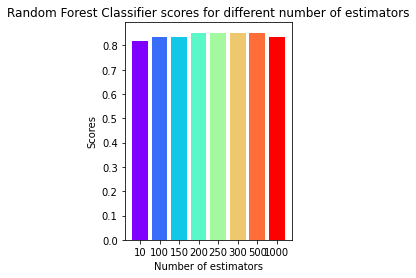

In [ ]:
colors = plt.cm.rainbow(np.linspace(0, 1, len(estimators)))
plt.bar([i for i in range(len(estimators))], rf_scores, color = colors, width = 0.8)
plt.xticks(ticks = [i for i in range(len(estimators))], labels = [str(estimator) for estimator in estimators])
plt.xlabel('Number of estimators')
plt.ylabel('Scores')
plt.title('Random Forest Classifier scores for different number of estimators')

Training the data based on 3 Training-Testing Ratios  [ 80:20, 70:30, 60:40 ]

In [ ]:
rf_classifier = RandomForestClassifier(n_estimators = 200, random_state = 50)
rf_classifier.fit(X_train1, y_train1)
rf_classifier.fit(X_train2, y_train2)
rf_classifier.fit(X_train3, y_train3)
estimator = rf_classifier.estimators_[4]


In [ ]:
predictions4 = rf_classifier.predict(X_test1)
predictions5 = rf_classifier.predict(X_test2)
predictions6 = rf_classifier.predict(X_test3)

### Results

TRAINING RATIO (80:20)

              precision    recall  f1-score   support

           0       0.92      0.74      0.82        31
           1       0.78      0.93      0.85        30

    accuracy                           0.84        61
   macro avg       0.85      0.84      0.83        61
weighted avg       0.85      0.84      0.83        61



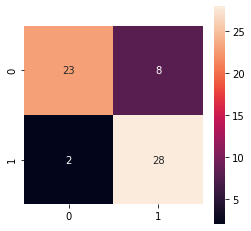

In [ ]:
tn4, fp4, fn4, tp4= confusion_matrix(y_test1, predictions4).ravel() #Extracting values of tn , fp , fn and tp from the confusion matrix
cf_matrix4=confusion_matrix(y_test1,predictions4) 
fig = plt.figure(figsize=(4,4))
sns.heatmap(cf_matrix4, annot=True, square = True)
print(classification_report(y_test1,predictions4))
tpr4=(tp4)/(tp4+fn4) #sensitivity
fpr4=(fp4)/(fp4+tn4) #false positive rate
fnr4=(fn4)/(tp4+fn4) 
npv4= tn4/(tn4+fn4) #Negative predictive value
fdr4=fp4/(fp4+tp4) #false discovery rate
mcc4= matthews_corrcoef(y_test1,predictions4) #Matthews Corelation Coefficient
pc4=precision_score(y_test1, predictions4)
f4, t4,_ = roc_curve(y_test1,predictions4)
rc4=auc(f4,t4)
f1score4 = f1_score(y_test1, predictions4)
specificity4= (tn4)/(tn4+fp4) #specificity
acc4=accuracy_score(y_test1, predictions4)


TRAINING RATIO (70:30)

              precision    recall  f1-score   support

           0       0.86      0.73      0.79        44
           1       0.78      0.89      0.83        47

    accuracy                           0.81        91
   macro avg       0.82      0.81      0.81        91
weighted avg       0.82      0.81      0.81        91



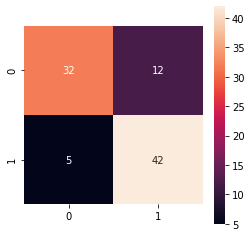

In [ ]:
tn5, fp5, fn5, tp5= confusion_matrix(y_test2, predictions5).ravel()
cf_matrix5=confusion_matrix(y_test2,predictions5) 
fig = plt.figure(figsize=(4,4))
sns.heatmap(cf_matrix5, annot=True, square = True)
print(classification_report(y_test2,predictions5))
tpr5=(tp5)/(tp5+fn5)    #sensitivity / true positive rate
fpr5=(fp5)/(fp5+tn5)  #false positive rate
fnr5=(fn5)/(tp5+fn5) #false negative rate
npv5= tn5/(tn5+fn5) #Negative predictive value
fdr5=fp5/(fp5+tp5) #false discovery rate
mcc5= matthews_corrcoef(y_test2,predictions5) #Matthews Corelation Coefficient
specificity5= (tn2)/(tn5+fp5) #specificity
f5, t5,_ = roc_curve(y_test2,predictions5) 
rc5=auc(f5,t5)
f1score5 = f1_score(y_test2, predictions5)
pc5=precision_score(y_test2, predictions5)
acc5=accuracy_score(y_test2, predictions5) 

TRAINING RATIO (60:40)

              precision    recall  f1-score   support

           0       0.88      0.72      0.79        60
           1       0.77      0.90      0.83        62

    accuracy                           0.81       122
   macro avg       0.82      0.81      0.81       122
weighted avg       0.82      0.81      0.81       122



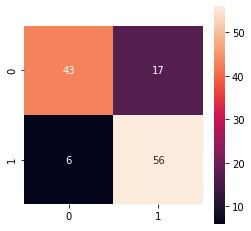

In [ ]:
tn6, fp6, fn6, tp6= confusion_matrix(y_test3, predictions6).ravel()
cf_matrix6=confusion_matrix(y_test3,predictions6) 
fig = plt.figure(figsize=(4,4))
sns.heatmap(cf_matrix6, annot=True, square = True)
print(classification_report(y_test3,predictions6))
tpr6=(tp6)/(tp6+fn6)
fpr6=(fp6)/(fp6+tn6) #false positive rate
fnr6=(fn6)/(tp6+fn6) 
npv6= tn6/(tn6+fn6) #Negative predictive value
fdr6=fp6/(fp6+tp6) #false discovery rate
pc6=precision_score(y_test3, predictions6)
mcc6= matthews_corrcoef(y_test3,predictions6) #Matthews Corelation Coefficient 
specificity6= (tn6)/(tn6+fp6) #specificity
f1score6= f1_score(y_test3, predictions6)
f6, t6,_ = roc_curve(y_test3,predictions6)
rc6=auc(f6,t6)
acc6=accuracy_score(y_test3, predictions6)

ROC Curve

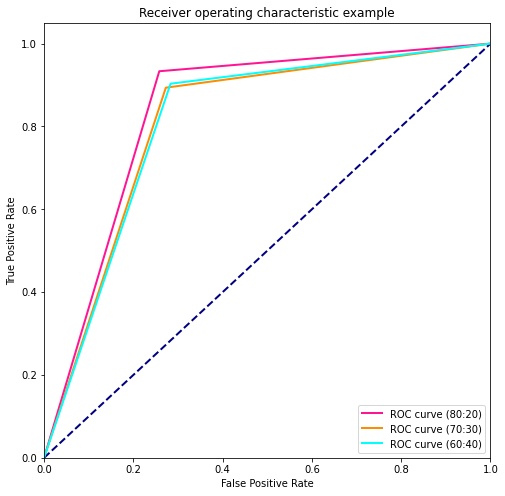

In [ ]:
plt.figure(figsize=(8,8))
lw = 2
plt.plot(f4, t4, color='deeppink',
         lw=lw, label='ROC curve (80:20)' % rc4)
plt.plot(f5, t5, color='darkorange',
         lw=lw, label='ROC curve (70:30)' % rc5)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.plot(f6, t6, color='aqua',
         lw=lw, label='ROC curve (60:40)' % rc6)

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

####Results for Hybrid Model

####Results in Graphical Form

Text(0.5, 0.98, 'RANDOM FOREST')

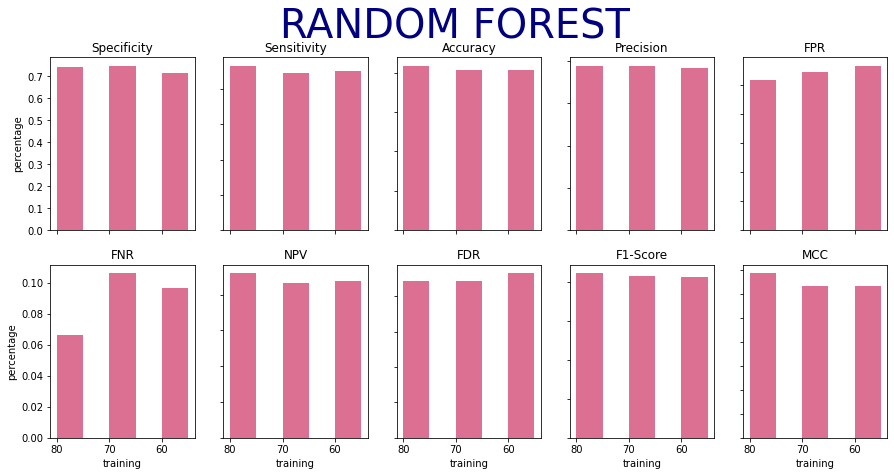

In [ ]:

training = [0,80,70,60]
data1 = [[specificity1, specificity2 , specificity3],
  [specificity4,specificity5,specificity6]]

data2 = [[tpr1, tpr2 , tpr3],
  [tpr4,tpr5,tpr6]]

data3 = [[acc1, acc2 , acc3],
  [acc4,acc5,acc6]]

data4 = [[pc1, pc2 , pc3],
  [pc4,pc5,pc6]]

data5 = [[fpr1, fpr2 , fpr3],
  [fpr4,fpr5,fpr6]]

data6 = [[fnr1, fnr2 , fnr3],
  [fnr4,fnr5,fnr6]]

data7 = [[npv1, npv2 , npv3],
  [npv4,npv5,npv6]]

data8 = [[fdr1, fdr2 , fdr3],
  [fdr4,fdr5,fdr6]]

data9 = [[f1_score1, f1_score2 , f1_score3],
  [f1score4,f1score5,f1score6]]

data10 = [[mcc1, mcc2 , mcc3],
  [mcc4,mcc5,mcc6]]

X= np.arange(3)

fig, axs = plt.subplots(2, 5,figsize=(15,7))

axs[0,0].bar(X + 0.25, data1[1], color = 'palevioletred', width = 0.5, label = 'Random Forest')
axs[0, 0].set_title('Specificity')

axs[0,1].bar(X + 0.25, data2[1], color =  'palevioletred', width = 0.5, label = 'Random Forest')
axs[0, 1].set_title('Sensitivity')

axs[0,2].bar(X + 0.25, data3[1], color =  'palevioletred', width = 0.5, label = 'Random Forest')
axs[0, 2].set_title('Accuracy')

axs[0,3].bar(X + 0.25, data4[1], color =  'palevioletred', width = 0.5 , label = 'Random Forest')
axs[0, 3].set_title('Precision')

axs[0,4].bar(X + 0.25, data5[1], color =  'palevioletred', width = 0.5, label = 'Random Forest')
axs[0, 4].set_title('FPR')


axs[1,0].bar(X + 0.25, data6[1], color =  'palevioletred', width = 0.5, label = 'Random Forest')
axs[1, 0].set_title('FNR')

axs[1,1].bar(X + 0.25, data7[1], color =  'palevioletred', width = 0.5, label = 'Random Forest')
axs[1, 1].set_title('NPV')

axs[1,2].bar(X + 0.25, data8[1], color =  'palevioletred', width = 0.5, label = 'Random Forest')
axs[1, 2].set_title('FDR')

axs[1,3].bar(X + 0.25, data9[1], color =  'palevioletred', width = 0.5, label = 'Random Forest')
axs[1, 3].set_title('F1-Score')

axs[1,4].bar(X + 0.25, data10[1], color =  'palevioletred', width = 0.5, label = 'Random Forest')
axs[1,4].set_title('MCC')


for ax in axs.flat:
    ax.set(xlabel='training', ylabel='percentage')


for ax in axs.flat:
    ax.label_outer()
    ax.set_xticklabels(training)
   

fig.suptitle('RANDOM FOREST' , color="navy" , size = 40)




####Results in Tabular Form

In [ ]:

data = [["Specificity",specificity4,specificity5,specificity6], ["Sensitivity",tpr4, tpr5 , tpr6], ["Accuracy",acc4, acc5,acc6], ["Precision",pc4, pc5,pc6], ["FPR",fpr4, fpr5,fpr6], ["FNR",fnr4,fnr5,fnr6 ], ["NPV",npv4, npv5,npv6], ["FDR",fdr4, fdr5,fdr6], ["F1-Score",f1score4, f1score5,f1score6], ["MCC",mcc4, mcc5,mcc6]]
pd.DataFrame(data, columns=["Algorithm and Measures ", "80:20 ","70:30","60:40"])

,Algorithm and Measures,80:20,70:30,60:40
0,Specificity,0.741935,0.750000,0.716667
1,Sensitivity,0.933333,0.893617,0.903226
2,Accuracy,0.836066,0.813187,0.811475
3,Precision,0.777778,0.777778,0.767123
4,FPR,0.258065,0.272727,0.283333
5,FNR,0.066667,0.106383,0.096774
6,NPV,0.920000,0.864865,0.877551
7,FDR,0.222222,0.222222,0.232877
8,F1-Score,0.848485,0.831683,0.829630
9,MCC,0.686431,0.631673,0.632162


# COMPARISON OF DECISION TREE AND RANDOM FOREST

RATIO 80:20

In [ ]:
import pandas as pd
data = [["Specificity",specificity1,specificity4], ["Sensitivity",tpr1, tpr4], ["Accuracy",acc1, acc4], ["Precision",pc1, pc4], ["FPR",fpr1, fpr4], ["FNR",fnr1,fnr4 ], ["NPV",npv1, npv4], ["FDR",fdr1, fdr4], ["F1-Score",f1_score1, f1score4], ["MCC",mcc1, mcc4]]
print("RATIO 80:20")
pd.DataFrame(data, columns=["Algorithm and Measures ", "Decision Tree ","Random Forest"])

RATIO 80:20


,Algorithm and Measures,Decision Tree,Random Forest
0,Specificity,0.774194,0.741935
1,Sensitivity,0.833333,0.933333
2,Accuracy,0.803279,0.836066
3,Precision,0.781250,0.777778
4,FPR,0.225806,0.258065
5,FNR,0.166667,0.066667
6,NPV,0.827586,0.920000
7,FDR,0.218750,0.222222
8,F1-Score,0.806452,0.848485
9,MCC,0.608181,0.686431


RATIO 70:30 

In [ ]:
import pandas as pd
data = [["Specificity",specificity2,specificity5], ["Sensitivity",tpr2, tpr5], ["Accuracy",acc2, acc5], ["Precision",pc2, pc5], ["FPR",fpr2, fpr5], ["FNR",fnr2,fnr5], ["NPV",npv2, npv5], ["FDR",fdr2, fdr5], ["F1-Score",f1_score2, f1score5], ["MCC",mcc2, mcc5]]
print("RATIO 70:30")
pd.DataFrame(data, columns=["Algorithm and Measures ", "Decision Tree ","Random Forest"])

RATIO 70:30


,Algorithm and Measures,Decision Tree,Random Forest
0,Specificity,0.750000,0.750000
1,Sensitivity,0.851064,0.893617
2,Accuracy,0.802198,0.813187
3,Precision,0.784314,0.777778
4,FPR,0.250000,0.272727
5,FNR,0.148936,0.106383
6,NPV,0.825000,0.864865
7,FDR,0.215686,0.222222
8,F1-Score,0.816327,0.831683
9,MCC,0.605175,0.631673


RATIO 60:40

In [ ]:
import pandas as pd
data = [["Specificity",specificity3,specificity6], ["Sensitivity",tpr3, tpr6], ["Accuracy",acc3, acc6], ["Precision",pc3, pc6], ["FPR",fpr3, fpr6], ["FNR",fnr3,fnr6 ], ["NPV",npv3, npv6], ["FDR",fdr3, fdr6], ["F1-Score",f1_score3, f1score6], ["MCC",mcc3, mcc6]]
print("RATIO 60:40")
pd.DataFrame(data, columns=["Algorithm and Measures ", "Decision Tree ","Random Forest"])

RATIO 60:40


,Algorithm and Measures,Decision Tree,Random Forest
0,Specificity,0.750000,0.716667
1,Sensitivity,0.822581,0.903226
2,Accuracy,0.786885,0.811475
3,Precision,0.772727,0.767123
4,FPR,0.250000,0.283333
5,FNR,0.177419,0.096774
6,NPV,0.803571,0.877551
7,FDR,0.227273,0.232877
8,F1-Score,0.796875,0.829630
9,MCC,0.574437,0.632162


##Comparison in Graphical Form

Text(0.5, 0.98, 'DECISION TREE VS RANDOM FOREST')

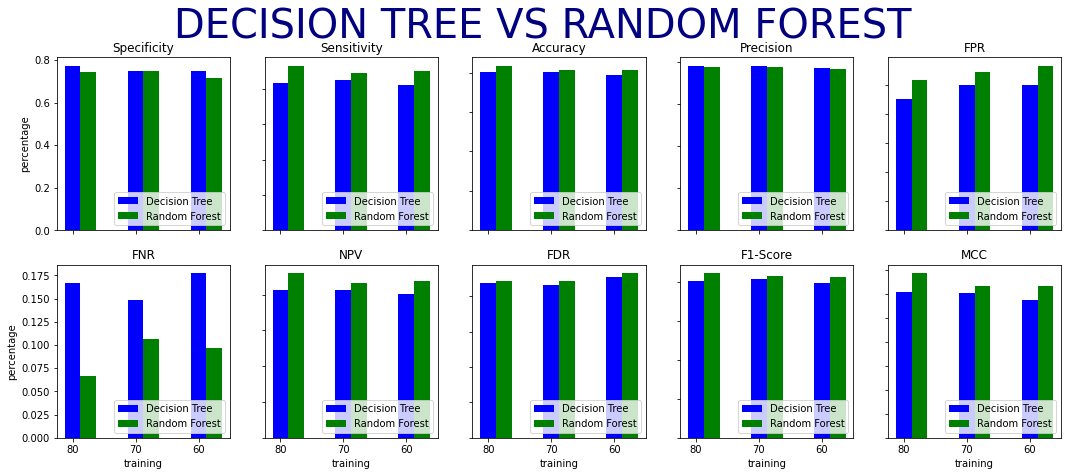

In [ ]:

training = [0,80,70,60]
data1 = [[specificity1, specificity2 , specificity3],
  [specificity4,specificity5,specificity6]]

data2 = [[tpr1, tpr2 , tpr3],
  [tpr4,tpr5,tpr6]]

data3 = [[acc1, acc2 , acc3],
  [acc4,acc5,acc6]]

data4 = [[pc1, pc2 , pc3],
  [pc4,pc5,pc6]]

data5 = [[fpr1, fpr2 , fpr3],
  [fpr4,fpr5,fpr6]]

data6 = [[fnr1, fnr2 , fnr3],
  [fnr4,fnr5,fnr6]]

data7 = [[npv1, npv2 , npv3],
  [npv4,npv5,npv6]]

data8 = [[fdr1, fdr2 , fdr3],
  [fdr4,fdr5,fdr6]]

data9 = [[f1_score1, f1_score2 , f1_score3],
  [f1score4,f1score5,f1score6]]

data10 = [[mcc1, mcc2 , mcc3],
  [mcc4,mcc5,mcc6]]

X= np.arange(3)

fig, axs = plt.subplots(2, 5,figsize=(18,7))
axs[0,0].bar(X +0, data1[0], color = 'b', width = 0.25,label = 'Decision Tree')
axs[0,0].bar(X + 0.25, data1[1], color = 'g', width = 0.25, label = 'Random Forest')
axs[0, 0].set_title('Specificity')


axs[0,1].bar(X+ 0, data2[0], color = 'b', width = 0.25,label = 'Decision Tree')
axs[0,1].bar(X + 0.25, data2[1], color = 'g', width = 0.25, label = 'Random Forest')
axs[0, 1].set_title('Sensitivity')


axs[0,2].bar(X + 0.00, data3[0], color = 'b', width = 0.25,label = 'Decision Tree')
axs[0,2].bar(X + 0.25, data3[1], color = 'g', width = 0.25, label = 'Random Forest')
axs[0, 2].set_title('Accuracy')


axs[0,3].bar(X + 0.00, data4[0], color = 'b', width = 0.25 , label = 'Decision Tree')
axs[0,3].bar(X + 0.25, data4[1], color = 'g', width = 0.25 , label = 'Random Forest')
axs[0, 3].set_title('Precision')


axs[0,4].bar(X + 0.00, data5[0], color = 'b', width = 0.25,label = 'Decision Tree')
axs[0,4].bar(X + 0.25, data5[1], color = 'g', width = 0.25, label = 'Random Forest')
axs[0, 4].set_title('FPR')
axs[0,4].legend()

axs[1,0].bar(X + 0.00, data6[0], color = 'b', width = 0.25,label = 'Decision Tree')
axs[1,0].bar(X + 0.25, data6[1], color = 'g', width = 0.25, label = 'Random Forest')
axs[1, 0].set_title('FNR')

axs[1,1].bar(X + 0.00, data7[0], color = 'b', width = 0.25,label = 'Decision Tree')
axs[1,1].bar(X + 0.25, data7[1], color = 'g', width = 0.25, label = 'Random Forest')
axs[1, 1].set_title('NPV')


axs[1,2].bar(X + 0.00, data8[0], color = 'b', width = 0.25,label = 'Decision Tree')
axs[1,2].bar(X + 0.25, data8[1], color = 'g', width = 0.25, label = 'Random Forest')
axs[1, 2].set_title('FDR')


axs[1,3].bar(X + 0.00, data9[0], color = 'b', width = 0.25,label = 'Decision Tree')
axs[1,3].bar(X + 0.25, data9[1], color = 'g', width = 0.25, label = 'Random Forest')
axs[1, 3].set_title('F1-Score')

axs[1,4].bar(X + 0.00, data10[0], color = 'b', width = 0.25,label = 'Decision Tree')
axs[1,4].bar(X + 0.25, data10[1], color = 'g', width = 0.25, label = 'Random Forest')
axs[1,4].set_title('MCC')


for ax in axs.flat:
    ax.set(xlabel='training', ylabel='percentage')


for ax in axs.flat:
    ax.label_outer()
    ax.set_xticklabels(training)
    ax.legend(loc='lower right')

fig.suptitle('DECISION TREE VS RANDOM FOREST' , color="navy" , size = 40)




In [ ]:
import tensorflow as tf 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import keras 
from keras.models import Sequential 
from keras.layers import Dense 
from sklearn.metrics import confusion_matrix 

Using TensorFlow backend.


# Accuracy vs Loss Comparison

In [ ]:
classifier = Sequential() 
classifier.add(Dense(activation = "relu", input_dim = 13,  
                     units = 8, kernel_initializer = "uniform")) 
classifier.add(Dense(activation = "relu", units = 14,  
                     kernel_initializer = "uniform")) 
classifier.add(Dense(activation = "sigmoid", units = 1,  
                     kernel_initializer = "uniform")) 
classifier.compile(optimizer = 'adam' , loss = 'binary_crossentropy',  
                   metrics = ['accuracy'] ) 


In [ ]:
history_2=classifier.fit(X , y ,validation_split=0.2, batch_size = 8 ,epochs = 30  ) 
history_3=classifier.fit(X , y ,validation_split=0.3, batch_size = 8 ,epochs = 30  ) 
history_4=classifier.fit(X , y ,validation_split=0.4, batch_size = 8 ,epochs = 30  ) 





dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])


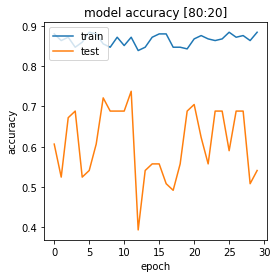

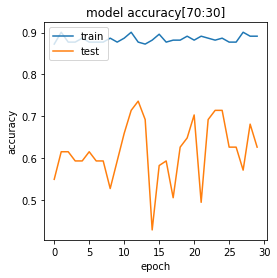

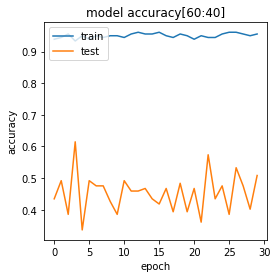

In [ ]:
print(history.history.keys())
plt.figure(figsize=(4,4))

# summarize history for accuracy
plt.plot(history_2.history['accuracy'])
plt.plot(history_2.history['val_accuracy'])

# plt.plot(history.history['val_accuracy'])
plt.title('model accuracy [80:20]')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
# plt.show()


plt.figure(figsize=(4,4))

plt.plot(history_3.history['accuracy'])
plt.plot(history_3.history['val_accuracy'])

plt.title('model accuracy[70:30]')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
# plt.show()

plt.figure(figsize=(4,4))
plt.plot(history_4.history['accuracy'])
plt.plot(history_4.history['val_accuracy'])

plt.title('model accuracy[60:40]')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()




dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])


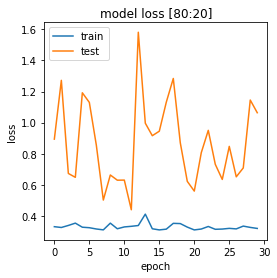

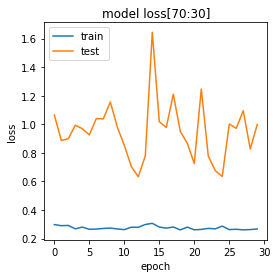

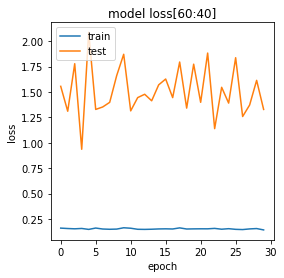

In [ ]:
print(history.history.keys())
plt.figure(figsize=(4,4))

# summarize history for accuracy
plt.plot(history_2.history['loss'])
plt.plot(history_2.history['val_loss'])

# plt.plot(history.history['val_accuracy'])
plt.title('model loss [80:20]')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
# plt.show()


plt.figure(figsize=(4,4))

plt.plot(history_3.history['loss'])
plt.plot(history_3.history['val_loss'])

plt.title('model loss[70:30]')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
# plt.show()

plt.figure(figsize=(4,4))
plt.plot(history_4.history['loss'])
plt.plot(history_4.history['val_loss'])

plt.title('model loss[60:40]')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


